## Q1. What are the key features of the wine quality data set?

The wine quality dataset contains the following input features:

- Fixed acidity  
- Volatile acidity  
- Citric acid  
- Residual sugar  
- Chlorides  
- Free sulfur dioxide  
- Total sulfur dioxide  
- Density  
- pH  
- Sulphates  
- Alcohol  
- (Target) Quality

**Importance:**  
Alcohol usually has a strong positive correlation with wine quality. Volatile acidity often lowers quality. Sulphates and citric acid can help improve it.


## Q2. How did you handle missing data in the wine quality dataset?

The dataset did not contain missing values, but if it did, I would handle them using:

- **Numerical features**: use the **median** (not affected by outliers)  
- **Categorical features**: use the **mode** (most frequent value)

**Pros and Cons:**

- Median is simple and works well with skewed data  
- KNN looks at similar rows but is slow  
- Regression can estimate values but assumes linearity  
- Dropping rows is fast but risky if important data is lost


## Q3. What are the key factors that affect students' performance in exams?

Some important factors include:

- Study time and habits  
- Parental education and support  
- Internet access at home  
- Health and sleep  
- Past performance  
- School support and resources

**How to analyze:**

- Use correlation for numerical features  
- Use boxplots for categorical ones  
- Apply ANOVA to compare groups  
- Use regression to find top influencing variables


## Q4. Describe the process of feature engineering in the student performance dataset.

Steps I would follow:

1. Handle missing data (with median/mode)  
2. Encode categorical variables using label or one-hot encoding  
3. Combine similar features (e.g. mother/father education)  
4. Create new features (e.g. attendance group, study category)  
5. Scale numeric data if needed for some models

This makes the dataset cleaner and helps the model learn better patterns.


## Q5. Observations and Conclusion

After checking histograms and distributions, we can see that features like:

- Residual sugar  
- Chlorides  
- Sulphates  

are not normally distributed. These could be transformed (e.g., log or sqrt) if needed before modeling.

**Conclusion:**  
The dataset is mostly clean and useful. Some features are skewed and may need transformations. This kind of EDA helps understand the data better before machine learning.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats


In [7]:
df = pd.read_csv('winequality-red.csv')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [42]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [43]:
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


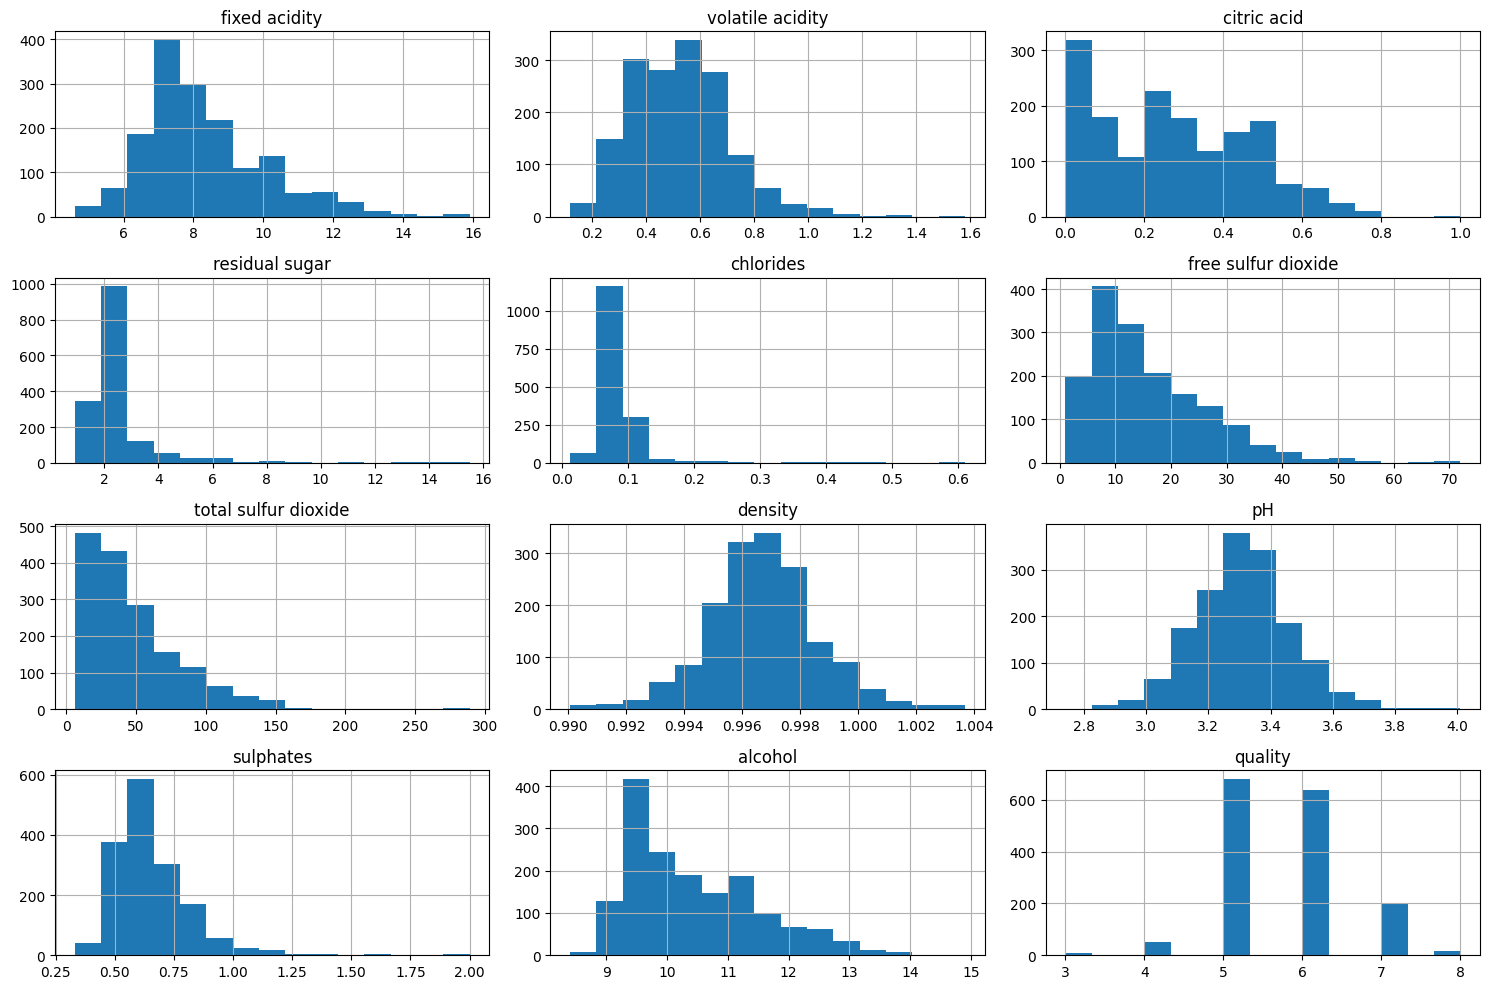

In [44]:
df.hist(bins=15, figsize=(15,10), layout=(4,3))
plt.tight_layout()
plt.show()


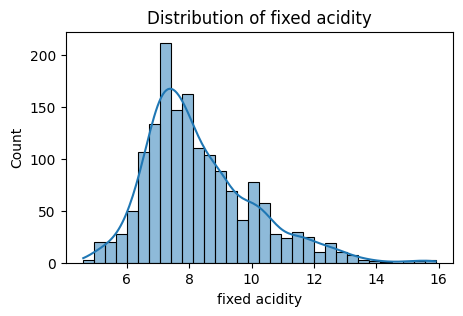

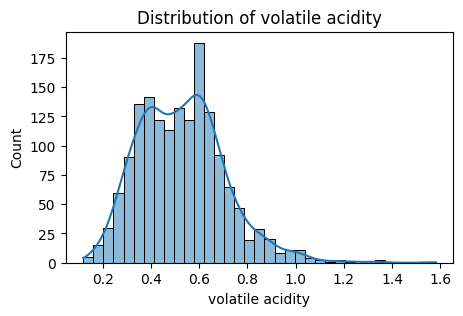

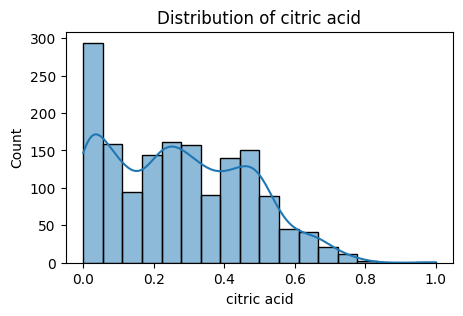

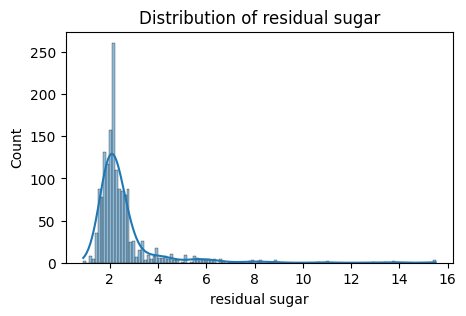

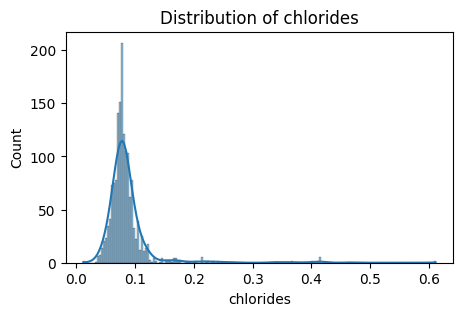

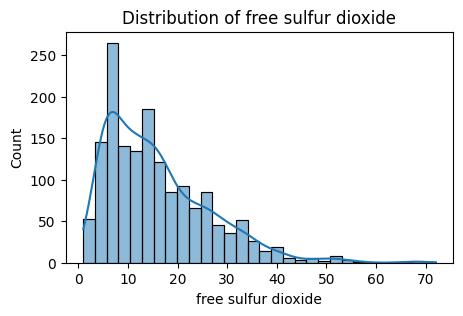

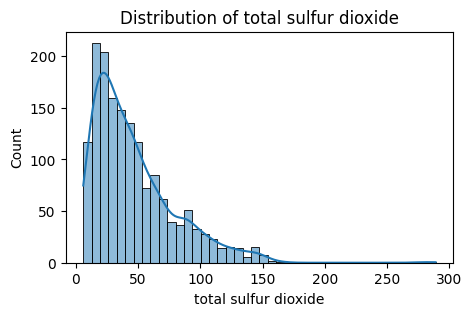

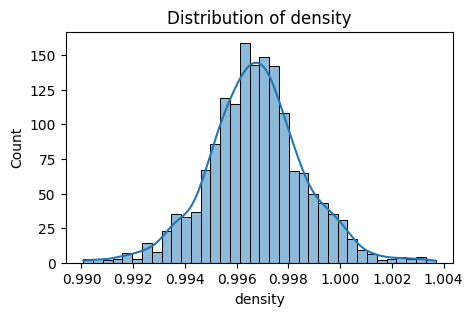

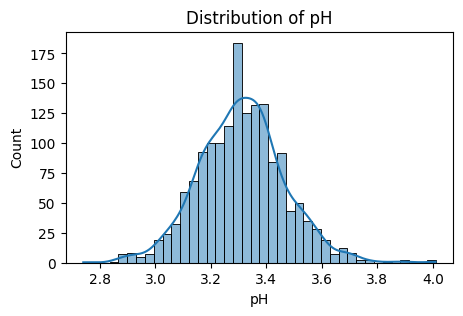

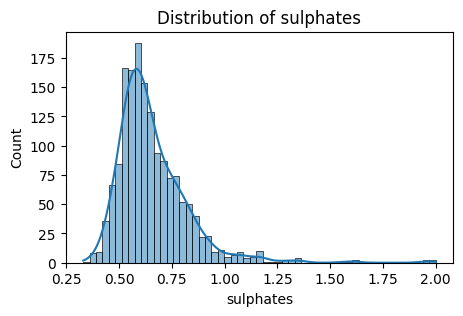

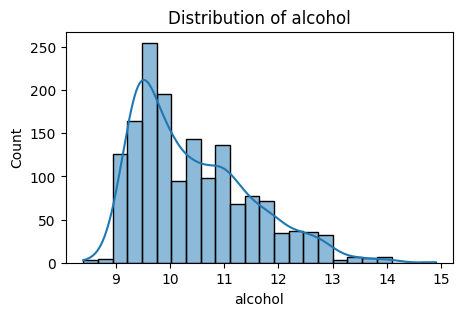

In [45]:
for column in df.columns[:-1]:  # Skip 'quality'
    plt.figure(figsize=(5,3))
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()


In [46]:
# Uncomment only if needed
# df['residual sugar'] = np.log1p(df['residual sugar'])
# df['chlorides'] = np.sqrt(df['chlorides'])
# df['sulphates'], _ = stats.boxcox(df['sulphates'])  # Must be positive


## 🔍 Q5: Exploratory Data Analysis (EDA) on Wine Quality Dataset
Let's examine the distribution of features in the wine quality dataset, identify non-normal distributions, and apply log transformations to improve normality where needed.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

wine_df = pd.read_csv('winequality-red.csv', sep=';')

# Plot histograms
fig, axes = plt.subplots(4, 3, figsize=(16, 12))
axes = axes.flatten()
for idx, col in enumerate(wine_df.columns[:-1]):
    sns.histplot(wine_df[col], bins=20, kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [ ]:
# Check skewness
skewness = wine_df.drop(columns='quality').skew().sort_values(ascending=False)
skewness[skewness > 1]

In [ ]:
# Apply log1p transformations to skewed features
wine_transformed = wine_df.copy()
highly_skewed = skewness[skewness > 1]
for col in highly_skewed.index:
    wine_transformed[f'log1p_{col}'] = np.log1p(wine_df[col])

# Plot original vs transformed
fig, axes = plt.subplots(len(highly_skewed), 2, figsize=(12, 4 * len(highly_skewed)))
for i, col in enumerate(highly_skewed.index):
    sns.histplot(wine_df[col], bins=20, kde=True, ax=axes[i][0])
    axes[i][0].set_title(f'Original: {col}')
    sns.histplot(wine_transformed[f'log1p_{col}'], bins=20, kde=True, ax=axes[i][1])
    axes[i][1].set_title(f'Log1p Transformed: {col}')
plt.tight_layout()
plt.show()